## Lesson 4 Notes

1. Pytorch is the main data structure in PyTorch
2. Autograd is a model used to calculuate gradients for training neural networks 

### Single Layer Neural Network 


1. Simple Example: given various input values multiply by the weights, sum all of them up to achieve the output. Than pass this through an activation function. 
2. The output can be generated by finding the dot product of the input and the weights. 
3. A sigmoid activation function squizzes the values between 0 and 1. 
4. torch.rand(x): Creates a random tensor. 

In [5]:
import torch 
def sigmoid(x):
    return 1/(1+torch.exp(-x))

for i in range(3):
    x = torch.rand(3)
    print(x)

tensor([0.8699, 0.7125, 0.8014])
tensor([0.1246, 0.5284, 0.1289])
tensor([0.5553, 0.0534, 0.9205])


### Networks 

1. Multiplying the features by weights returns a new tensor. 
2. Multiple ways to change a tensor. 

---2.1: Reshape, the tensor must be the same size

---2.2: Resize: The shape changes

---2.3: View: Returns a new tensor with the same size

In [14]:
features = torch.rand((1,5))
weights = torch.randn_like(features)

print("Method 1: Reshaping")
weights = weights.reshape(5, 1)
print(weights)

print("Method 2: Resizing")   
weights.resize_(2, 3)
print(weights)

print("Method 3: View")
weights = weights.view(1, 6)
print(weights)

Method 1: Reshaping
tensor([[-0.3364],
        [-0.3000],
        [ 0.9367],
        [-0.8321],
        [-0.8589]])
Method 2: Resizing
tensor([[-0.3364, -0.3000,  0.9367],
        [-0.8321, -0.8589,  0.0000]])
Method 3: View
tensor([[-0.3364, -0.3000,  0.9367, -0.8321, -0.8589,  0.0000]])


## Multi-Player Network 

1. The output of the first layer becomes the input of the next layer 
2. It is also possible to convert between numpy and pyTorch arrays 

In [26]:
import numpy as np
x = np.random.rand(5, 6)
print(x)
x = torch.from_numpy(x)
print(x)
x.numpy()

[[0.17698887 0.43140258 0.44533437 0.81781291 0.00185514 0.98560505]
 [0.7348304  0.69331036 0.295731   0.45153352 0.6511645  0.75648109]
 [0.72901256 0.51150662 0.65010497 0.75495484 0.98788565 0.55775569]
 [0.02354275 0.20867556 0.09601424 0.06477305 0.21147404 0.32829829]
 [0.9228853  0.18409156 0.70917809 0.02389355 0.41605309 0.53638009]]
tensor([[0.1770, 0.4314, 0.4453, 0.8178, 0.0019, 0.9856],
        [0.7348, 0.6933, 0.2957, 0.4515, 0.6512, 0.7565],
        [0.7290, 0.5115, 0.6501, 0.7550, 0.9879, 0.5578],
        [0.0235, 0.2087, 0.0960, 0.0648, 0.2115, 0.3283],
        [0.9229, 0.1841, 0.7092, 0.0239, 0.4161, 0.5364]],
       dtype=torch.float64)


array([[0.17698887, 0.43140258, 0.44533437, 0.81781291, 0.00185514,
        0.98560505],
       [0.7348304 , 0.69331036, 0.295731  , 0.45153352, 0.6511645 ,
        0.75648109],
       [0.72901256, 0.51150662, 0.65010497, 0.75495484, 0.98788565,
        0.55775569],
       [0.02354275, 0.20867556, 0.09601424, 0.06477305, 0.21147404,
        0.32829829],
       [0.9228853 , 0.18409156, 0.70917809, 0.02389355, 0.41605309,
        0.53638009]])

## Neural Networks

1. inline: Allows to build large neural networks in an effecient way. 
2. Pytorch's nn module provides a nice way to build large neural networks 
3. Torchvision: A package along pytorch that provides datasets and models. Can be used for:

3.1. datasets

3.2. transforms

3.3. models

4. Batch size: The amount of images per batch

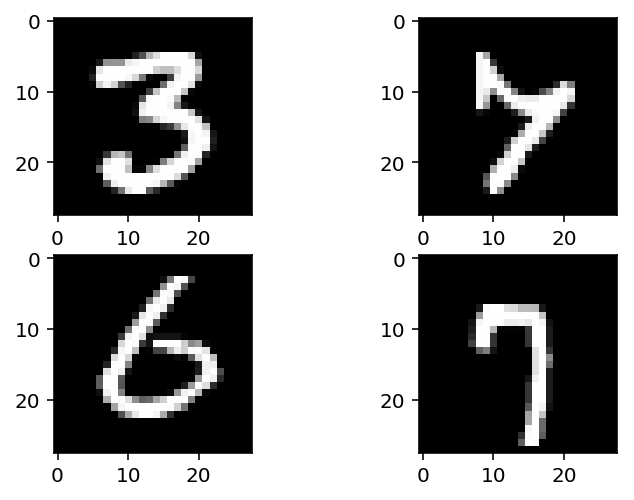

In [60]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import time 
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
                               ])

trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)   # 64 images per trainloader 


dataiter = iter(trainloader)
images, labels = dataiter.next()

f, axarr = plt.subplots(2, 2);
axarr[0,0].imshow(images[4].numpy().squeeze(), cmap='Greys_r');
axarr[0,1].imshow(images[0].numpy().squeeze(), cmap='Greys_r');
axarr[1,0].imshow(images[1].numpy().squeeze(), cmap='Greys_r');
axarr[1,1].imshow(images[2].numpy().squeeze(), cmap='Greys_r');



## Softmax 

To calcluate the probability distribution we use a softmax function. Mathamtical appearance:
$$
\Large \sigma(x_i) = \cfrac{e^{x_i}}{\sum_k^K{e^{x_k}}}
$$
Note that this function will only return a value between 0 and 1

1. Create a tensor that is a vector of 64 elements by adding all the exponents 
2. Resize the tensor
2. Divide by the exponential valaue 

In [84]:
def sigmoid(x):
    """Takes any range of real numbers and returns the output value. 
    This function produces a curve in shape "S"
    Used for binary classification """
    return 1/(1+torch.exp(-x))

def softmax(x):
    total = torch.sum(torch.exp(x), dim=1).view(-1,1)
    expL = torch.exp(x)
    return total/expL



## Building networks with PyTorch

1. We new to use .view() to flatten the tensor into a useful shape. For example: `images.view(images.shape[0], -1)` 
2. No matter which method is chosen, input units are multiplied by weights, hidden units are multiplied by weights and so until the output is reached

**Method 1: Class**

Long Way: 
1. Must use `super().__init__()` so PyTorch registers all the all the operations you put in the network.
2. Insinde init use: `nn.Linear(input, hidden)` to create a linear transformation
3. Inside init use: `self.sigmoid = nn.Sigmoid()` to define a sigmoid function using the class
4. Inside init use: `self.softmax = nn.Softmax(dim=1)` to define a softmax function
5. Create `forward()` method which represents the tensor going through the operations. 
6. Inside forward use: `x = self.hidden(x)` passing the tensor through the hidden layer
7. Inside forward use: `x = self.sigmoid(x)` which runs through sigmoid activation
8. Inside forward use: `x = self.output(x)` passing the tensor through the output layer
9. Inside forward use: `x = self.softmax(x)` which runs through softmax activation

Shorter Way:
Import `torch.nn.functional as F` which makes the code nicer so we don't have to actually define sigmoid and softmax inside init and instead they are included in the forward method. This is because sigmoid and softmax are simply element wise operations so there is no need to define extra elements. 




In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()    # using the init model of nn.Module 
        
        input_size = 784 
        hidden_size = [128, 64]
        output_size = 10
        self.hidden1 = nn.Linear(input_size, hidden_size[0])
                                 
        self.hidden2 = nn.Linear(hidden_size[0], hidden_size[1])  
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(hidden_size[1], output_size)   
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):   
        # Pass the input tensor through each of our operations and eventually give us an output. 
        x = self.hidden1(x)  # passing through hidden 
        x = F.relu(x)
        s = self.hidden2(x)
        x = F.relu()
        x = self.output(x)
        x = F.softmax(x)
        
        return x

## Activation Functions 

There are multiple activation functions available

1. Sigmoid
2. Relu: Rectified linear unit.  
3. TanH

## Training Neural Networks 

1. Universal Function approximator: Networks that approximate a function to model a dataset
2. Loss Function: Depends on the output of the network 
3. Gradient: The slope of a loss function, points in direction of the fastest change
4. Backpropgation: Taking the gradient and passing them backwards to find the new weights
5. Learning Rate: A way to avoid bouncing too far

** Different Types Of Losses: ** 

1. `nn.CrossEntropyLoss`
2. `nn.NLLLoss()`

** Grad **
1. `requires_grad = True` tells PyTorch to track the operations on a tensor.
2. `torch.set_grad_enables(True|False)` allow you to set gradients globally

** Actual Training **

1. Define amount of epochs 
2. For the range of epochs (set running_loss = 0)
3. for images, labels in trainloader:
4. `optimizer.zero_grad()`
5. Pass the images through the model
6. Calclulate the loss
7. Do a backward pass
8. Do the optimzier step


In [ ]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

## Inference and Validation

1. Inference: Using your trained network to make predictions
2. `ps.topk()`: Returns the probability value and the class for the highest probability values. 

** Process**

1. After every epoch, Initialize validation variables
2. for images, labels in testloader:
3. Run the images through the model 
4. Measure the test_loss
5. Check whether the top class equals the output 
6. Increase the accuracy if it equals given that equals is a FloatTensor
7. Append the running_loss divided the length of the trainloader to train_losses
8. Repeat for test losses
9. Print our accuracy, loss, Train Loss, and epoch. 






In [ ]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 5
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

**Dropout**: Used to avoid overfitting

`model.eval()`: Used to turn off dropout, set model in eval mode
`model.train()`: Used to train on dropout, set model in train mode


## Saving & Loading

1. The parameters are stored in `model.state_dict()` 
2. Saving: `torch.save(model.state_dict(), name)`
3. Loading: `state_dict = torch.load(name)`
4. Loading into model: `model.load_state_dict(state_dict)`

However, with new model you get an error of incosistent tensors. To fix it we can:

1. Create checkpoint variable with the input, output, and hidden sizes
2. Note that we use `out_features` to get the layers in the hidden layers
3. Save the checkpoint 
4. Load the checkpoint 
5. Change model to be of the same size 
6. Load the state_dict 

In [ ]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

## Loading Image Data


1. Transforms: Changes to the images such as resizing, cropping, converting to a tensor, etc..
2. Data Loaders: Defining batch_size, setting shuffle to change order

**Data Augmentation - Introducting randomness into data, including**
2. `RandomRotation()` 
3. `RandomResizedCrop()` 
4. `RandomHorizontalFlip()`


In [ ]:
data_dir = 'Cat_Dog_data'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5,0.5,0.5])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.5, 0.5, 0.5],
                                                         [0.5, 0.5, 0.5])])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

## Pre-trained Networks 

1. Convulational networks: Converting form of input in terms of 1s and 0s into something we understand
2. `torchvision.models()`: Finding models 
3. Using a pretrained network for our own data